# Introduction and Environment Setup

The advent of powerful Large Language Models (LLMs) has fundamentally altered the landscape of artificial intelligence applications.

The primary interface for these models is natural language, making the skill of crafting effective inputs—a discipline known as **prompt engineering**—a critical component for developers and researchers.

Prompt engineering is not merely the act of asking a question; it is the science of designing and optimizing prompts to guide LLMs toward desired outcomes with precision, reliability, and efficiency.

As models grow in capability, the sophistication of interaction methods must evolve in parallel.

Simple instructions suffice for simple tasks, but unlocking the full potential for complex reasoning, persona adoption, and interaction with external systems requires a more advanced approach.

## Setup your free API Key using Google's AI Studio

https://aistudio.google.com/


### Install necessary libraries

In [1]:
!pip install --upgrade --quiet langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 1.5 MB/s eta 0:00:00


In [4]:
import os
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI

# Access the API key from Colab Secrets
os.environ["GOOGLE_API_KEY"] = userdata.get("GOOGLE_API_KEY")

# Initialize the model
gemini_client = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

# Now you can use the llm to interact with the model
response = gemini_client.invoke("""
###ROLE###
You are a **professional chef and culinary creative director** with expertise in global cuisines, food pairing science, and home-cooking optimization. You specialize in transforming limited or random ingredients into exciting, flavorful dishes.

###CONTEXT###
The user will provide a list of ingredients they currently have available at home.

* The ingredient list may be short, incomplete, or unconventional.
* The user may be a home cook with average kitchen skills and standard equipment.
* The goal is not just to suggest obvious dishes, but to inspire **interesting, creative, and enjoyable recipes** that are still practical to cook.

###TASK###

1. Analyze the given ingredients and identify possible flavor profiles, cuisines, and cooking techniques they lend themselves to.
2. Propose **3–5 interesting recipe ideas** that can be made primarily from the provided ingredients.
3. For each recipe:

   * Give a **clear, appealing name**
   * Provide a **1–2 sentence description** explaining why it’s interesting or unique
   * List **any optional add-ons or substitutions** (clearly marked as optional)
4. Prioritize creativity, flavor balance, and realism over overly complex or gourmet techniques.
5. If ingredients are missing for a classic recipe, creatively adapt it instead of rejecting it.

###CONSTRAINTS###

* Do NOT require rare, expensive, or hard-to-find ingredients.
* Do NOT assume access to professional kitchen equipment.
* Avoid overly generic suggestions unless you add a creative twist.
* Keep each recipe concise and easy to understand.
* Do not repeat the same core idea across multiple recipes.

###EXAMPLES###
**Input Ingredients:**
Eggs, tomatoes, onions, bread, cheese

**Example Output:**

* **Spiced Tomato & Cheese Egg Toast** – A savory, pan-fried toast topped with soft scrambled eggs simmered in spiced tomatoes and onions for a bold, comforting breakfast.
* **Rustic Onion-Tomato Egg Bake** – A simple oven-style dish where eggs are baked over caramelized onions and tomatoes, finished with melted cheese.
* **Cheesy Tomato Bread Skillet** – Toasted bread layered with sautéed tomatoes, onions, and cheese, finished with a cracked egg for richness.

###OUTPUT FORMAT###
Return the response in **markdown**, using the following structure:

**Recipe 1: [Name]**
Description
Optional add-ons

**Recipe 2: [Name]**
Description
Optional add-ons

(Repeat as needed)

I have milk, strawberry and sauce.
""")
print(response.content)

Chef, this is a delightfully minimalist challenge! With milk, strawberries, and a mysterious "sauce," we're leaning into comforting, sweet, and surprisingly elegant territory. The key here is to let each ingredient shine and to make that "sauce" the intriguing wildcard.

Here are a few creative ways to transform your ingredients:

**Recipe 1: Velvet Strawberry Milkshake with Mystery Swirl**
A classic, refreshing milkshake made with fresh strawberries and milk, elevated by a beautiful swirl or layer of your chosen "sauce" for an extra dimension of flavor and visual appeal.
*   **Optional add-ons:** A scoop of ice cream (vanilla works best), a few ice cubes for extra chill, a touch of vanilla extract, a sprinkle of sugar or honey if strawberries aren't sweet enough.

**Recipe 2: Gentle Warm Strawberry Milk Elixir**
A comforting and soothing warm drink, where milk is gently infused with fresh strawberries, creating a delicate, naturally sweet beverage, perfect for winding down, with a hin

In [5]:
image_description_prompt = """
**Role:**
You are an expert Computer Vision Metadata Specialist and SEO Archivist. You possess a deep understanding of visual semantics, image indexing, and natural language retrieval. Your capability involves translating visual data into precise, machine-readable text optimized for search algorithms.

**Context:**
We are building a high-performance multimodal search engine. The metadata you generate will be used to populate a vector database, allowing users to find images using both specific keyword matching and semantic natural language queries (e.g., "a quiet place to work with coffee"). High accuracy and descriptive depth are required to distinguish between similar images.

**Task:**
Analyze the provided image and generate a structured JSON object containing detailed metadata. You must extract the main subject, describe the scene atmospherics, identify visual elements, transcribe specific text, and generate search-optimized keywords.

**Constraints:**

1.  **Description:** Must be objective and factual. Limit to 2-3 sentences. Focus on action, lighting, and mood.
2.  **Text Content:** If no text is visible, return `null`. If text is visible, transcribe it exactly as it appears, preserving case where possible.
3.  **Keywords:** Provide exactly 10-15 keywords. Mix broad concepts (e.g., "urban," "melancholy") with specific objects (e.g., "red umbrella," "taxi").
4.  **Safety:** Do not generate content that violates safety policies. If the image is unclear or blurry, note this in the description.
5.  **Format:** The output must be raw JSON only. Do not include markdown formatting (like ` json ...  `) or conversational filler.

**Examples:**

*Input:* [An image of a golden retriever catching a frisbee in a park on a sunny day]

*Output:*

```json
{
  "main_subject": "Golden Retriever dog",
  "detailed_description": "A golden retriever leaps into the air to catch a red frisbee against a clear blue sky. The lighting is bright and natural, casting sharp shadows on the green grass below. The mood is energetic and playful.",
  "visual_elements": [
    "Golden Retriever",
    "Red Frisbee",
    "Green Grass",
    "Blue Sky",
    "Motion Blur"
  ],
  "text_content": null,
  "search_keywords": [
    "dog",
    "pet",
    "playing",
    "fetch",
    "frisbee",
    "park",
    "sunny",
    "action shot",
    "canine",
    "jumping",
    "outdoor",
    "joyful",
    "golden retriever",
    "summer"
  ]
}
```

**Output Format:**
Generate the response in the following JSON structure:

```json
{
  "main_subject": "String",
  "detailed_description": "String",
  "visual_elements": ["String", "String"],
  "text_content": "String or null",
  "search_keywords": ["String", "String"]
}
```
"""

# Processing One Image

In [8]:
import os
import base64
import mimetypes
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage

# 1. Setup
os.environ["GOOGLE_API_KEY"] = userdata.get("GOOGLE_API_KEY")

# Initialize the model
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0.2
)

# 2. Helper function to encode image to Base64
def encode_image(image_path):
    """Encodes a local image to base64 string."""
    # https://en.wikipedia.org/wiki/Base64
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# 3. The Metadata Function
def generate_search_metadata(image_path, llm, prompt_text):
    """
    Generates a detailed description using LangChain and Gemini.
    """
    try:
        # Determine mime type (e.g., 'image/jpeg', 'image/png')
        mime_type, _ = mimetypes.guess_type(image_path)
        if not mime_type:
            mime_type = 'image/jpeg' # Default fallback

        # Get Base64 string
        img_base64 = encode_image(image_path)

        # Create the Multimodal Message
        # LangChain expects a list of dictionaries for multimodal content
        message = HumanMessage(
            content=[
                {"type": "text", "text": prompt_text},
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:{mime_type};base64,{img_base64}"}
                }
            ]
        )

        # Invoke the LLM
        response = llm.invoke([message])

        return response.content.replace('```json', '').replace('```', '')

    except FileNotFoundError:
        print(f"Error: The file at {image_path} was not found.")
        return None
    except Exception as e:
        print(f"An error occurred during generation: {e}")
        return None

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
image_path = "/content/drive/MyDrive/Colab Notebooks/day17_pics/Screenshot (10).png"

# Run the function
metadata = generate_search_metadata(image_path, llm, image_description_prompt)

if metadata:
    print(metadata)


{
  "main_subject": "Digital screen displaying a presentation slide within an application interface",
  "detailed_description": "A computer screen shows a presentation slide divided into two sections: a white background with bulleted text on the left and a solid purple background with large white text on the right. The screen is framed by a dark application interface, including a sidebar navigation and a Windows taskbar at the bottom. The lighting is even and bright, characteristic of a digital display, conveying an informative and structured environment.",
  "visual_elements": [
    "Computer screen",
    "Presentation slide",
    "Application interface",
    "Sidebar navigation",
    "Windows taskbar",
    "Bullet points",
    "Text",
    "Purple background",
    "White background",
    "Search bar",
    "Icons (Activity, Chat, Teams, Calendar, Calls, Files, Apps, Help, Weather, Search, Folder, Browser, Speaker, Wi-Fi, Battery, Notification)",
    "Buttons (Need help?, Leave)",
    

# Processing All Images

In [11]:
import os
import json

source_folder = "/content/drive/MyDrive/Colab Notebooks/day17_pics"
output_folder = "/content/drive/MyDrive/Bootcamp/jsons"

os.makedirs(output_folder, exist_ok=True)

# Supported image extensions to filter for
valid_extensions = ('.jpg', '.jpeg', '.png', '.webp', '.heic')

print(f"Starting processing for images in: {source_folder}\n")

files = os.listdir(source_folder)
# Calculate total relevant files for the progress counter
total_files = len([f for f in files if f.lower().endswith(valid_extensions)])
processed_count = 0

for filename in files:
    if filename.lower().endswith(valid_extensions):

        image_path = os.path.join(source_folder, filename)

        # Define the output JSON path (same name as image, but .json extension)
        json_filename = f"{os.path.splitext(filename)[0]}.json"
        json_path = os.path.join(output_folder, json_filename)

        if os.path.exists(json_path):
            print(f"[{processed_count + 1}/{total_files}] Skipping: {filename} (JSON already exists)")
            processed_count += 1
            continue

        print(f"[{processed_count + 1}/{total_files}] Generating metadata for: {filename}...")

        try:
            # Call your existing function
            description = generate_search_metadata(image_path, llm, image_description_prompt)

            # Ensure description is parsed to dict if returned as string
            if isinstance(description, str):
                description = json.loads(description)

            if description:
                # Prepare the data structure
                data = {
                    "file_path": image_path,
                    "description": description
                }

                # Write to JSON file
                with open(json_path, 'w', encoding='utf-8') as json_file:
                    json.dump(data, json_file, indent=4)

                print(f"   -> Saved to {json_filename}")
            else:
                print(f"   -> Skipped {filename} (Generation returned empty)")

        except Exception as e:
            print(f"   -> Error processing {filename}: {e}")

        processed_count += 1

print("\n--- Processing Complete ---")

Starting processing for images in: /content/drive/MyDrive/Colab Notebooks/day17_pics

[1/30] Generating metadata for: Screenshot 2026-01-10 203604.png...
   -> Saved to Screenshot 2026-01-10 203604.json
[2/30] Generating metadata for: Screenshot (10).png...
   -> Saved to Screenshot (10).json
[3/30] Generating metadata for: Screenshot (11).png...
   -> Saved to Screenshot (11).json
[4/30] Generating metadata for: Screenshot (12).png...
   -> Saved to Screenshot (12).json
[5/30] Generating metadata for: Screenshot (13).png...
   -> Saved to Screenshot (13).json
[6/30] Generating metadata for: Screenshot (14).png...
   -> Saved to Screenshot (14).json
[7/30] Generating metadata for: Screenshot (15).png...
   -> Saved to Screenshot (15).json
[8/30] Generating metadata for: Screenshot (16).png...
   -> Saved to Screenshot (16).json
[9/30] Generating metadata for: Screenshot (17).png...
   -> Saved to Screenshot (17).json
[10/30] Generating metadata for: Screenshot (18).png...
   -> Saved t

# Creating Embeddings

In [12]:
!pip install -U -q langchain-google-genai langchain-chroma chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.4/21.4 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.0/220.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently

In [36]:
import os
import json
import time
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_chroma import Chroma
from langchain_core.documents import Document
from google.colab import userdata
import shutil # Import shutil for removing directories

# 1. Setup
os.environ["GOOGLE_API_KEY"] = userdata.get("GOOGLE_API_KEY")

# Define the *local* path for Chroma DB first
# This ensures we always have write permissions
local_db_path = "/content/chroma_db"

# Define the target Google Drive path for persistence (optional, can be copied later)
google_drive_db_path = "/content/drive/MyDrive/Bootcamp/chroma_db"

json_folder = "/content/drive/MyDrive/Bootcamp/jsons"

# Initialize Embeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")

# 2. Check if DB exists before doing heavy lifting
# We check if the local folder exists and is not empty
db_exists = os.path.exists(local_db_path) and os.listdir(local_db_path)

if db_exists:
    print(f"Database found at {local_db_path}. Loading existing VectorStore...")
    vectorstore = Chroma(
        persist_directory=local_db_path,
        embedding_function=embeddings
    )
    if vectorstore._collection.count() == 0:
        print("Existing local DB is empty. Removing and starting fresh ingestion...")
        shutil.rmtree(local_db_path) # Remove the empty DB directory
        db_exists = False # Force the ingestion path
    else:
        print(f"Loaded existing DB with {vectorstore._collection.count()} documents.")

if not db_exists:
    print("Database not found or was empty. Starting ingestion process...")

    # Load ALL JSONs into a list of Documents first (No API calls here)
    documents = []

    if os.path.exists(json_folder):
        files = [f for f in os.listdir(json_folder) if f.endswith('.json')]
        print(f"Found {len(files)} JSON files. Preparing data...")

        for filename in files:
            file_path = os.path.join(json_folder, filename)
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
                desc_obj = data.get("description", {})

                # Construct Context
                text_content = f"""
                Subject: {desc_obj.get('main_subject', 'Unknown')}
                Description: {desc_obj.get('detailed_description', '')}
                Keywords: {', '.join(desc_obj.get('search_keywords', []))}
                Visual Elements: {', '.join(desc_obj.get('visual_elements', []))}
                """

                doc = Document(
                    page_content=text_content,
                    metadata={
                        "file_name": data.get("file_name", filename),
                        "file_path": data.get("file_path", "")
                    }
                )
                documents.append(doc)
    else:
        print("JSON folder not found.")

    # 3. Add to Chroma in Batches with Timeout
    if documents:
        print(f"Loaded {len(documents)} documents. Starting ingestion with rate limits...")

        # Initialize the DB (This creates the folder)
        vectorstore = Chroma(
            persist_directory=local_db_path, # Use local path for writing
            embedding_function=embeddings
        )

        BATCH_SIZE = 5
        total_batches = (len(documents) + BATCH_SIZE - 1) // BATCH_SIZE

        for i in range(0, len(documents), BATCH_SIZE):
            batch = documents[i : i + BATCH_SIZE]
            current_batch_num = (i // BATCH_SIZE) + 1

            print(f"Processing Batch {current_batch_num}/{total_batches} ({len(batch)} docs)...")

            # A. Add documents (This triggers the API Call)
            vectorstore.add_documents(batch)

            # B. Wait if this is not the last batch
            if i + BATCH_SIZE < len(documents):
                print("   -> Waiting 60 seconds to respect rate limits...")
                time.sleep(60)

        print(f"\nSuccess! All documents saved to: {local_db_path}")

        # Optional: Copy the local DB to Google Drive after successful ingestion
        if os.path.exists(google_drive_db_path):
            print(f"Removing old Google Drive DB at {google_drive_db_path}")
            shutil.rmtree(google_drive_db_path)
        print(f"Copying newly created DB from {local_db_path} to {google_drive_db_path}")
        shutil.copytree(local_db_path, google_drive_db_path)
        print("Copy complete.")

    else:
        print("No documents to process.")

Database not found or was empty. Starting ingestion process...
Found 19 JSON files. Preparing data...
Loaded 19 documents. Starting ingestion with rate limits...
Processing Batch 1/4 (5 docs)...
   -> Waiting 60 seconds to respect rate limits...
Processing Batch 2/4 (5 docs)...
   -> Waiting 60 seconds to respect rate limits...
Processing Batch 3/4 (5 docs)...
   -> Waiting 60 seconds to respect rate limits...
Processing Batch 4/4 (4 docs)...

Success! All documents saved to: /content/chroma_db
Copying newly created DB from /content/chroma_db to /content/drive/MyDrive/Bootcamp/chroma_db
Copy complete.


In [34]:
import google.generativeai as genai
from google.colab import userdata
import os

os.environ["GOOGLE_API_KEY"] = userdata.get("GOOGLE_API_KEY")
genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

print("Available embedding models:")
for m in genai.list_models():
    if "embedContent" in m.supported_generation_methods:
        print(f"- {m.name}")

Available embedding models:
- models/gemini-embedding-001


Database loaded successfully!
results [Document(id='5baeb980-e806-4cc4-b7af-2280a3cecd20', metadata={'file_name': 'Screenshot 2026-01-15 191017.json', 'file_path': '/content/drive/MyDrive/Colab Notebooks/day17_pics/Screenshot 2026-01-15 191017.png'}, page_content="\n                Subject: Clash Royale game interface\n                Description: A screenshot displays the user interface of the mobile game Clash Royale running in a windowed desktop environment. The scene shows a grid of mostly greyed-out cards with elixir costs, indicating an 'OPPONENTS TURN' with '7sec' remaining on a timer. The lighting is bright and even, characteristic of a digital display, conveying a paused or strategic moment in gameplay.\n                Keywords: Clash Royale, mobile game, strategy game, card game, gameplay, screenshot, user interface, UI, elixir, opponent's turn, timer, gaming, digital, video game, RougherRein1\n                Visual Elements: Clash Royale game, Game interface, Card grid, Gr

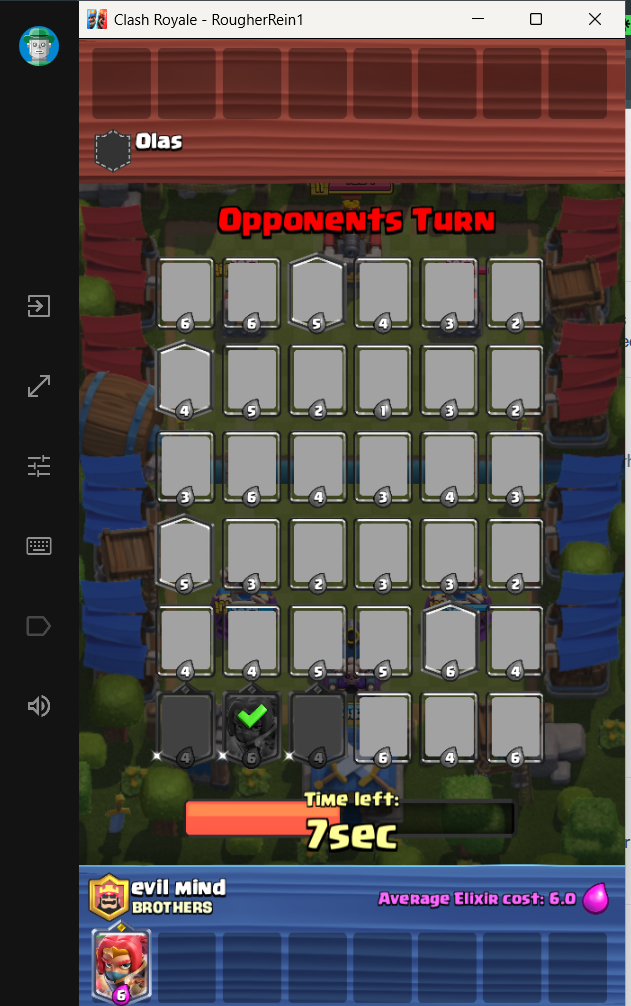

----------------------------------------
Match #2
File: Screenshot 2026-01-08 192613.json
Context: 
                Subject: Game user interface dialogue box
                Description: A dark brown...


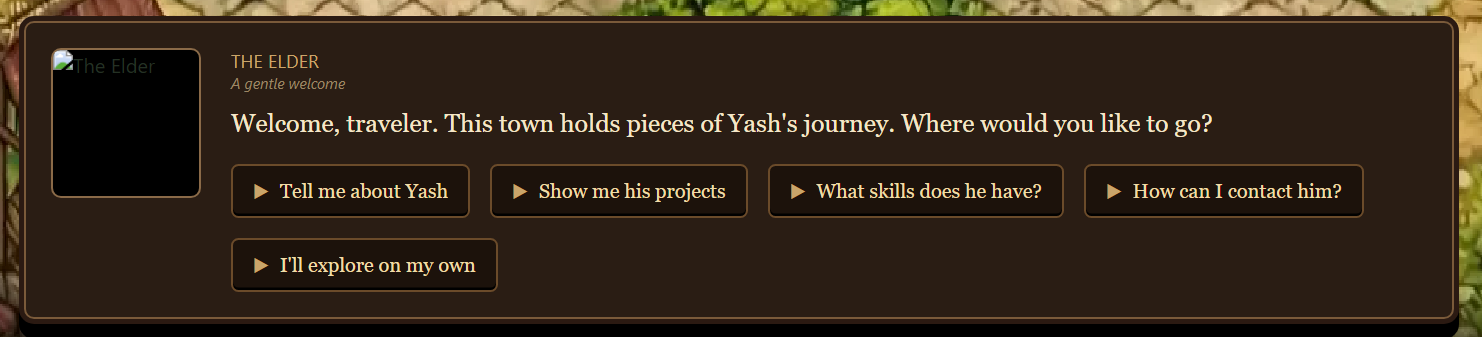

----------------------------------------
Match #3
File: Screenshot 2025-12-30 002157.json
Context: 
                Subject: Pixel-art character in a park
                Description: An isometric, p...


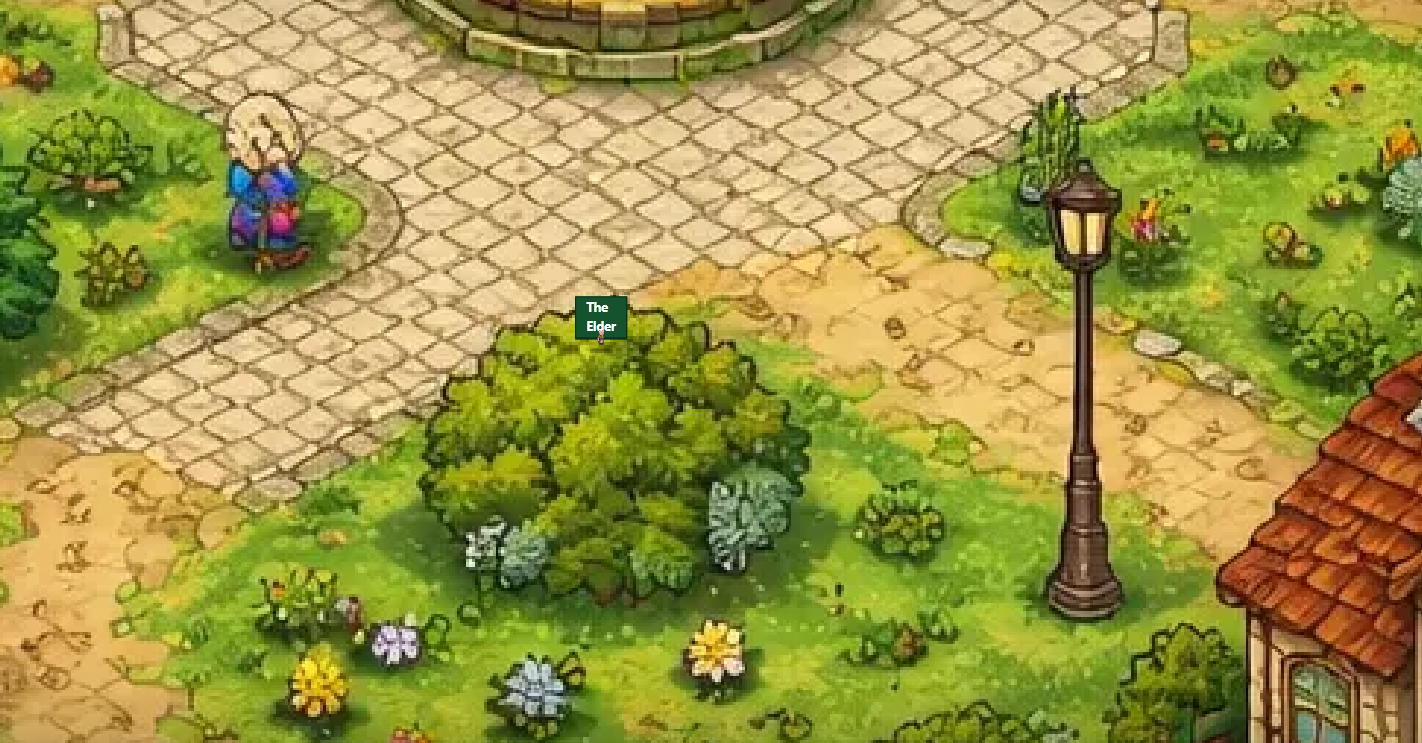

----------------------------------------


In [40]:
import os
from langchain_chroma import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from google.colab import userdata
from IPython.display import display, Image


db_path = "/content/drive/MyDrive/Bootcamp/chroma_db"

# IMPORTANT: Must use the exact same model name you used to create the DB
embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")


# Load the Database
# We point to the persist_directory to load the existing index
vectorstore = Chroma(
    persist_directory=db_path,
    embedding_function=embeddings
)

print("Database loaded successfully!")

def search_images(query, top_k=3):
    """
    Searches the vector DB for images matching the text query.
    """

    # Perform Similarity Search
    # This embeds the query and finds the 'top_k' closest vectors
    results = vectorstore.similarity_search(query, k=top_k)
    print("results",results)

    if not results:
        print("No matches found.")
        return None

    # Display Results
    for i, doc in enumerate(results):
        file_path = doc.metadata.get("file_path")
        subject = doc.metadata.get("main_subject")
        file_name = doc.metadata.get("file_name")

        print(f"Match #{i+1}")
        print(f"File: {file_name}")
        print(f"Context: {doc.page_content[:100]}...") # Show first 100 chars of description

        # Display the actual image
        if os.path.exists(file_path):
            display(Image(filename=file_path, width=300))
        else:
            print(f"Image file not found at: {file_path}")

        print("-" * 40)


search_images("card")

results [Document(id='5baeb980-e806-4cc4-b7af-2280a3cecd20', metadata={'file_path': '/content/drive/MyDrive/Colab Notebooks/day17_pics/Screenshot 2026-01-15 191017.png', 'file_name': 'Screenshot 2026-01-15 191017.json'}, page_content="\n                Subject: Clash Royale game interface\n                Description: A screenshot displays the user interface of the mobile game Clash Royale running in a windowed desktop environment. The scene shows a grid of mostly greyed-out cards with elixir costs, indicating an 'OPPONENTS TURN' with '7sec' remaining on a timer. The lighting is bright and even, characteristic of a digital display, conveying a paused or strategic moment in gameplay.\n                Keywords: Clash Royale, mobile game, strategy game, card game, gameplay, screenshot, user interface, UI, elixir, opponent's turn, timer, gaming, digital, video game, RougherRein1\n                Visual Elements: Clash Royale game, Game interface, Card grid, Greyed-out cards, Elixir cost nu

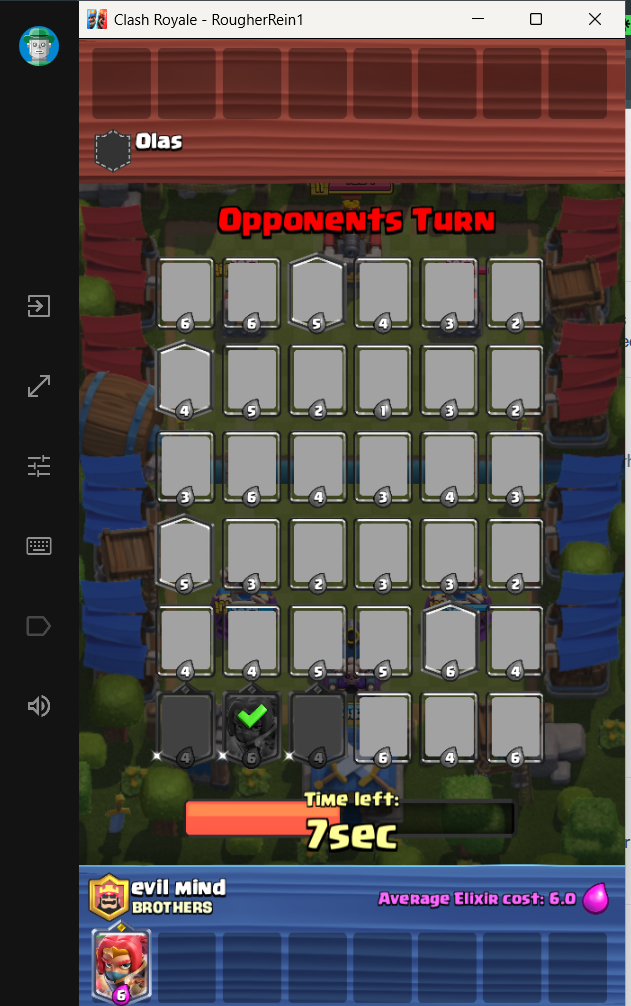

----------------------------------------
Match #2
File: Screenshot 2026-01-08 192613.json
Context: 
                Subject: Game user interface dialogue box
                Description: A dark brown...


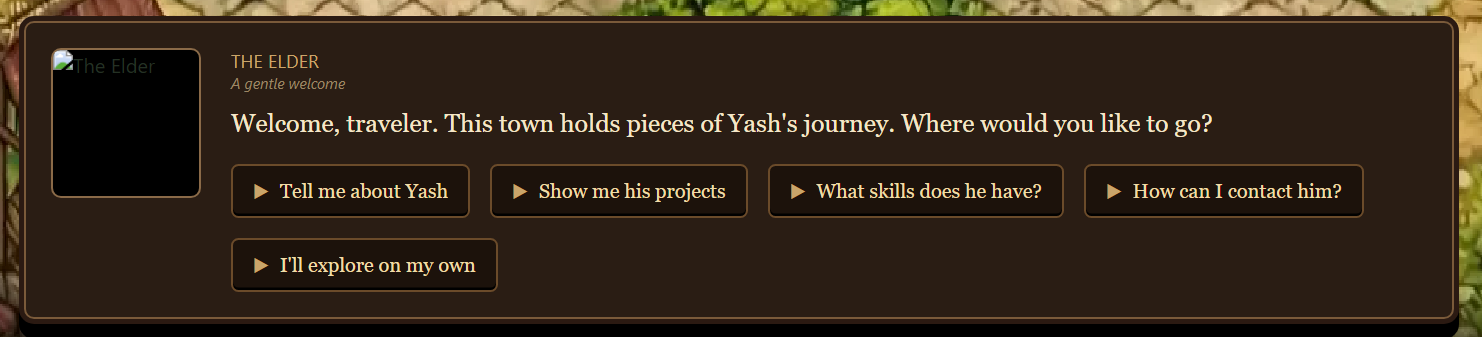

----------------------------------------
Match #3
File: Screenshot 2026-01-08 171345.json
Context: 
                Subject: Video game scene with an elderly NPC and dialogue interface
              ...


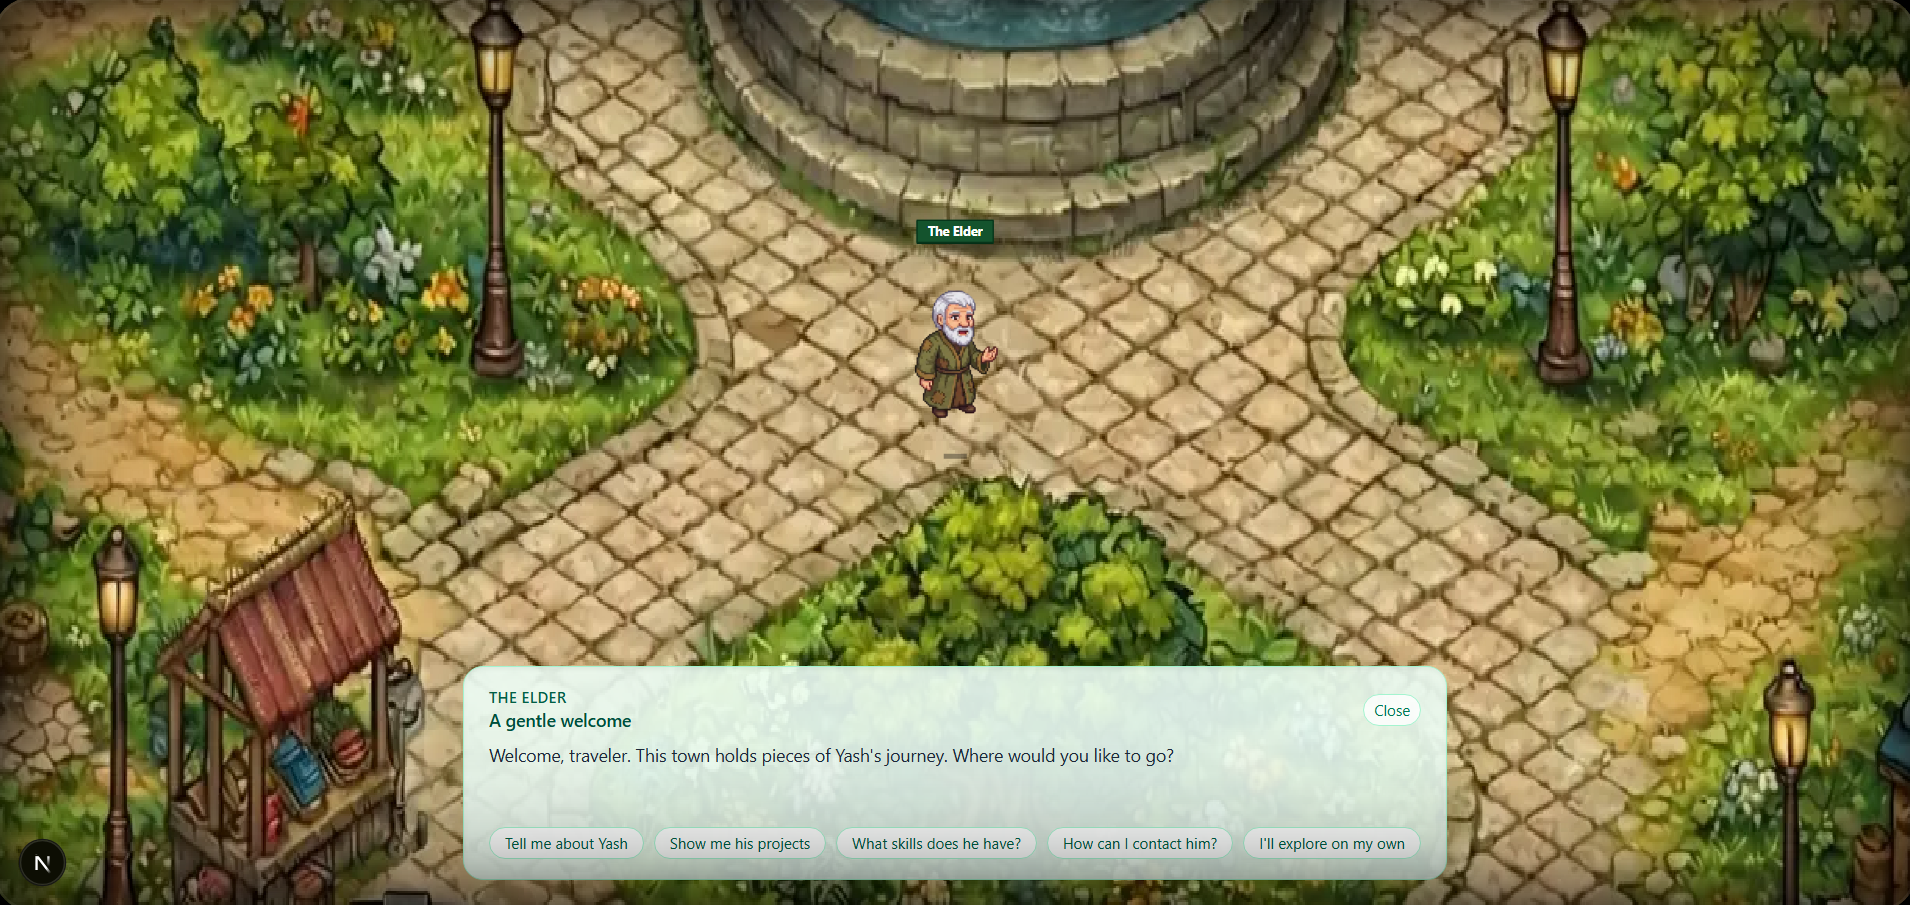

----------------------------------------


In [41]:
search_images("clash")

# Submissions

**Take Any dataset of images to your choice , ( it should contain your personal data ) (atleast 15-20) of them and implement this RAG into it , and submit the link of the notebook with your generations**